# Completing a complex analysis with a team of LLM agents

Authors:  
 - [Lior Gazit](https://www.linkedin.com/in/liorgazit).  
 - [Meysam Ghaffari](https://www.linkedin.com/in/meysam-ghaffari-ph-d-a2553088/).  

This notebook is taught and reviewed in our book:  
**[Mastering NLP from Foundations to LLMs](https://www.amazon.com/dp/1804619183)**  
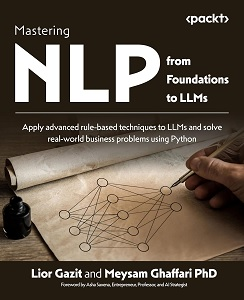

This Colab notebook is referenced in our book's Github repo:   
https://github.com/PacktPublishing/Mastering-NLP-from-Foundations-to-LLMs  

**The motivation for this notebook:**  
Here we will show how a **team of multiple agents**, each with a different designated role, could serve as a professional team. The use case we chose is a continuation of the previous code we ran in:   
**Ch9_RAGLlamaIndex_Prompt_Compression.ipynb**  

In the last code, we performed a complex evaluation of employing prompt compression, and when that code finished, we had two resulting items, the dict that holds the numeric measurements of the experiments, called “record”, and the verbal statements about the resulting agreement rate, reduction of tokens and cost, and the change in processing time.

With that previous notebook, we intentionally stopped short. We didn’t visualize the reduction in tokens and cost, and we didn’t form an opinion as to whether we advocate for employing the prompt reductions.

We will take the results from that evaluation and we will task a team of agents to perform the visualization and the conclusion for us!

**Reference:**
This notebook was built using Microsoft's repo:  
https://github.com/microsoft/autogen/tree/main/notebook  

**Requirements:**  
* When running in Colab, use this runtime notebook setting: `Python 3, CPU`  
* This code picks OpenAI's API as a choice of LLM, so a paid **API key** is necessary.   

>*```Disclaimer: The content and ideas presented in this notebook are solely those of the authors and do not represent the views or intellectual property of the authors' employers.```*

Install:

In [ ]:
# REMARK:
# If the below code error's out due to a Python package discrepency, it may be because new versions are causing it.
# In which case, set "default_installations" to False to revert to the original image:
default_installations = True
if default_installations:
  !pip -q install pyautogen
else:
  import requests
  text_file_path = "requirements__Ch9_Completing_a_Complex_Analysis_with_a_Team_of_LLM_Agents.txt"
  url = "https://raw.githubusercontent.com/PacktPublishing/Mastering-NLP-from-Foundations-to-LLMs/main/Chapter9_notebooks/" + text_file_path
  res = requests.get(url)
  with open(text_file_path, "w") as f:
    f.write(res.text)

  !pip install -r requirements__Ch9_Completing_a_Complex_Analysis_with_a_Team_of_LLM_Agents.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.7/191.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00


Imports:

In [ ]:
import autogen

Code Settings:

Define OpenAI's API key:  
**You must provide a key and paste it as a string!**  

In [ ]:
api_key = "..."

Define the config dictionary per AutoGen's requirements:  
See more details and options here:  
https://github.com/microsoft/autogen/blob/main/notebook/config_loader_utility_functions.ipynb

In [ ]:
gpt_type = "gpt-3.5-turbo"
config_list = autogen.get_config_list([api_key],
                                      base_urls=None,  # You can specify API base URLs if needed. eg: localhost:8000
                                      api_type="openai",  # Type of API, e.g., "openai" or "aoai".,
                                      api_version=None,  # Specify API version if needed.
                                      )
config_list[0]["model"] = gpt_type
llm_config = {"config_list": config_list}


## Creating a visualization of the significance of the experiments  
The file [record.pickle `put the link to the file in Packt's repo!!`](...) is of a dict variable. It is the collection of numerical results from the previous evaluation notebook. Our wish is to visualize the distributions of the token counts for each of the experiments. There are token counts for original prompts, and token counts for compressed prompts. There are also the ratios between the two, for each experiment.

In this section we form a team to put a code together that would visualize the distributions of each of the three.


### Define the task to be fulfilled by the team

In [ ]:
plot_task = """Refer to the Python dict that is in this URL: <https://github.com/LiorGazit/Misc/raw/main/record.pickle>. The dict's variable name is called 'record'.
You will analyze data from 3 of its fields: 'original_tokens', 'compressed_tokens', 'ratios'.
Convert these three columns from a dict variable to a Pandas DataFrame variable and perform the following operations on the dataframe.
Each row refers to an experiment where a prompt's tokens are being compressed so to make the prompt shorter.
So for each experiment there are 3 values being logged in the dict, 'original_tokens' corresponds to the prompt's original tokens count,
'compressed_tokens' corresponds to the tokens count after having the prompt compressed, and 'ratios' is the ratio between the two, calculated as 'original_tokens/(compressed_tokens + 1)'.
Your task is to design a multi plot in Python.
The multi plot would have two figures, top figure and bottom figure.
The top figure will have the frequency distribution of each of the two data fields, 'original_tokens', 'compressed_tokens'.
The bottom plot would have the frequency distribution of the 'ratios'.
Make sure to properly label the axes, the legend and the header of each sub plot."""

### Define the agents and assign team members roles  
For this task we would need three team members, a programmer to write the code, a QA engineer to run the code and provide feedback, and a team lead to verify when the task is complete.

In [ ]:
programmer = autogen.AssistantAgent(
    name="programmer",
    llm_config=llm_config,
    system_message="""
        You are an experienced and professional Python programmer.
        When everything is completed reply just one word, "TERMINATE", without chit chats.
        Keep all your conversations very short and concise!
        """,
)

qa_engineer = autogen.AssistantAgent(
    name="qa_engineer",
    llm_config=llm_config,
    system_message="""
        You are an experienced and professional Python programmer.
        Your specialty is executing code and identifying the causes of the errors and the bugs.
        You articulate them properly to the other agents for them to fix the problems.
        When everything is completed reply just one word, "TERMINATE", without chit chats.
        Keep all your conversations very short and concise!
        """,
    code_execution_config={
        "last_n_messages": 10,
        "work_dir": "tasks",
        "use_docker": False,
    },)


lead = autogen.UserProxyAgent(
    name="lead",
    human_input_mode="NEVER",
    is_termination_msg=lambda x: x.get("content", "").find("TERMINATE") >= 0,
    code_execution_config={
        "last_n_messages": 10,
        "work_dir": "tasks",
        "use_docker": False,
    },)

### Define a group conversation

In [ ]:
groupchat_0 = autogen.GroupChat(agents=[programmer, qa_engineer],
                                speaker_selection_method='auto',
                                messages=[],
                                max_round=50)

manager_0 = autogen.GroupChatManager(
    groupchat=groupchat_0,
    name="manager_0",
    llm_config={"config_list": config_list},
    is_termination_msg=lambda x: x.get("content", "").find("TERMINATE") >= 0,
    code_execution_config={
        "last_n_messages": 1,
        "work_dir": "tasks",
        "use_docker": False,
    },
)

### Deploy the team

In [ ]:
lead.initiate_chats(
    [
        {"recipient": manager_0, "message": plot_task, "summary_method": "reflection_with_llm", "clear_history": True},
    ]
)


********************************************************************************
Start a new chat with the following message: 
Refer to the Python dict that is in this URL: <https://github.com/LiorGazit/Misc/raw/main/record.pickle>. The dict's variable name is called 'record'.
You will analyze data from 3 of its fields: 'original_tokens', 'compressed_tokens', 'ratios'.
Convert these three columns from a dict variable to a Pandas DataFrame variable and perform the following operations on the dataframe.
Each row refers to an experiment where a prompt's tokens are being compressed so to make the prompt shorter.
So for each experiment there are 3 values being logged in the dict, 'original_tokens' corresponds to the prompt's original tokens count,
'compressed_tokens' corresponds to the tokens count after having the prompt compressed, and 'ratios' is the ratio between the two, calculated as 'original_tokens/(compressed_tokens + 1)'.
Your task is to design a multi plot in Python.
The multi p

programmer (to manager_0):

```python
import pandas as pd
import matplotlib.pyplot as plt

# Load the record dict from URL
import requests
import pickle

url = 'https://github.com/LiorGazit/Misc/raw/main/record.pickle'
response = requests.get(url)
record = pickle.loads(response.content)

# Convert selected fields to DataFrame
df = pd.DataFrame(record)

# Calculate the 'ratios' column
df['ratios'] = df['original_tokens'] / (df['compressed_tokens'] + 1)

# Create a multi-plot
fig, axs = plt.subplots(2, 1)

# Top figure: Frequency distribution of 'original_tokens' and 'compressed_tokens'
df[['original_tokens', 'compressed_tokens']].plot(kind='hist', alpha=0.5, bins=20, ax=axs[0])
axs[0].set_title('Original Tokens vs Compressed Tokens')
axs[0].legend()

# Bottom figure: Frequency distribution of 'ratios'
df['ratios'].plot(kind='hist', alpha=0.5, bins=20, ax=axs[1], color='g')
axs[1].set_title('Ratio of Original Tokens to Compressed Tokens')
plt.xlabel('Ratio')
plt.ylabel('Frequency')

plt.


>>>>>>>> EXECUTING CODE BLOCK 0 (inferred language is python)...
qa_engineer (to manager_0):

exitcode: 0 (execution succeeded)
Code output: 
Figure(640x480)


--------------------------------------------------------------------------------


programmer (to manager_0):

TERMINATE

--------------------------------------------------------------------------------


[ChatResult(chat_history=[{'content': "Refer to the Python dict that is in this URL: <https://github.com/LiorGazit/Misc/raw/main/record.pickle>. The dict's variable name is called 'record'.\nYou will analyze data from 3 of its fields: 'original_tokens', 'compressed_tokens', 'ratios'.\nConvert these three columns from a dict variable to a Pandas DataFrame variable and perform the following operations on the dataframe.\nEach row refers to an experiment where a prompt's tokens are being compressed so to make the prompt shorter.\nSo for each experiment there are 3 values being logged in the dict, 'original_tokens' corresponds to the prompt's original tokens count,\n'compressed_tokens' corresponds to the tokens count after having the prompt compressed, and 'ratios' is the ratio between the two, calculated as 'original_tokens/(compressed_tokens + 1)'.\nYour task is to design a multi plot in Python.\nThe multi plot would have two figures, top figure and bottom figure.\nThe top figure will hav

### Running the code that the programmer created

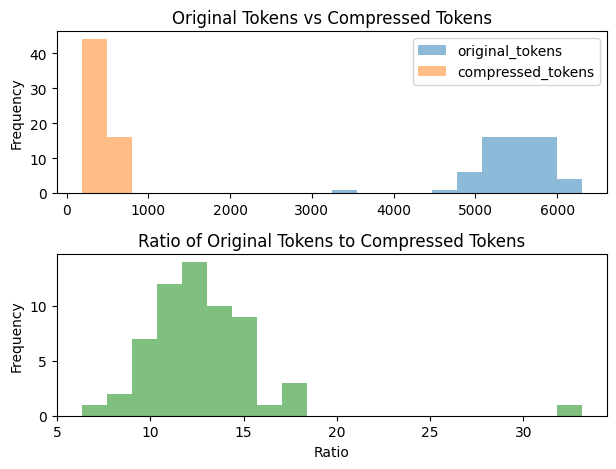

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the record dict from URL
import requests
import pickle

url = 'https://github.com/LiorGazit/Misc/raw/main/record.pickle'
response = requests.get(url)
record = pickle.loads(response.content)

# Convert selected fields to DataFrame
df = pd.DataFrame(record)

# Calculate the 'ratios' column
df['ratios'] = df['original_tokens'] / (df['compressed_tokens'] + 1)

# Create a multi-plot
fig, axs = plt.subplots(2, 1)

# Top figure: Frequency distribution of 'original_tokens' and 'compressed_tokens'
df[['original_tokens', 'compressed_tokens']].plot(kind='hist', alpha=0.5, bins=20, ax=axs[0])
axs[0].set_title('Original Tokens vs Compressed Tokens')
axs[0].legend()

# Bottom figure: Frequency distribution of 'ratios'
df['ratios'].plot(kind='hist', alpha=0.5, bins=20, ax=axs[1], color='g')
axs[1].set_title('Ratio of Original Tokens to Compressed Tokens')
plt.xlabel('Ratio')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Review the results of the experiments and form an educated conclusion
As with every complex evaluation where we perform experiments to target the impact of a particular feature, we would now like to derive a qualitative summary of the results and suggest a conclusion for our audience, whether it is decision makers in the company, or the research community in academia.

What is unique about this part is that the act of deriving a conclusion has never been left to any mathematical or algorithmic model to derive. As we humans govern the various evaluations, while we may seek to automate as much as possible so to feed into the final conclusion, we are the entity that forms the final impression and conclusion.

### Define the task to be fulfilled by the team

In [ ]:
description_of_true_results = """
The experiments for evaluating the quality and consequences of prompt compression using LLMLingua are completed.
Here is the technical summart of the results:

1. Classification Performance
Here we measure the impact of the compression of the retrieved context.
We hold everything else constant, meaning, for the same prompt and the same choice of LLM, we check for rate of aggreement between the case of utilizing the context in its original form, vs. compressing it:
Agreements: 55 out of 60 total cases
Disagreements: 5 out of 60 total cases
Agreement rate of 92%

2. Reduction of Resources: Reduction of sent token translates directly to reduction of $ expenses
Note that in our use-case the returned response is a single word, i.e. a single token, thus we don't need to evaluate the reduction of returned tokens, as they remain the same for both RAG cases:
Non-compressed: Total tokens sent in 60 calls: 327654
Compressed:     Total tokens sent in 60 calls: 26473
Reduction in tokens: 92%
Comressed Ratio: 12.50x

3. Processing Times:
Non-compressed: Total iteration time over 60 calls: 76
Compressed:     Total iteration time over 60 calls: 839
"""

description_of_bad_results = """
The experiments for evaluating the quality and consequences of prompt compression using LLMLingua are completed.
Here is the technical summart of the results:

1. Classification Performance
Here we measure the impact of the compression of the retrieved context.
We hold everything else constant, meaning, for the same prompt and the same choice of LLM, we check for rate of aggreement between the case of utilizing the context in its original form, vs. compressing it:
Agreements: 14 out of 60 total cases
Disagreements: 46 out of 60 total cases
Agreement rate of 23%

2. Reduction of Resources: Reduction of sent token translates directly to reduction of $ expenses
Note that in our use-case the returned response is a single word, i.e. a single token, thus we don't need to evaluate the reduction of returned tokens, as they remain the same for both RAG cases:
Non-compressed: Total tokens sent in 60 calls: 327654
Compressed:     Total tokens sent in 60 calls: 264730
Reduction in tokens: 19%
Comressed Ratio: 1.23x

3. Processing Times:
Non-compressed: Total iteration time over 60 calls: 76
Compressed:     Total iteration time over 60 calls: 839
"""


In [ ]:
conclusion_task_template = """Refer to the results printed below.
These are the results that stem from the experiments from the previous part of the conversation.
The experiments that examine the consequences that the prompt compression has on various metrics.
Read the results that appear in the txt file and let the writer write an executive summary in the form of a conclusion on the value and trade offs of using prompt compression.
It should be comprised of several sentences separated by a new line.
The final line should tell explicitly whether the method of prompt compression is recommended or not recommended!
The writer should write it as concise bullet points with key arguments and takeaways.
The principal_engineer should act as a critic and set the standard.
Here are the results:
{
<results>
}"""
conclusion_task_true_results = conclusion_task_template.replace("<results>", description_of_true_results)
conclusion_task_bad_results = conclusion_task_template.replace("<results>", description_of_bad_results)

### Define the agents and assign team members roles  
For this task we would need three team members, a principal engineer who is and experienced technical person, a technical writer who writes the conclusion per the principal engineer's feedback, and a team lead to verify when the task is complete, which was defined in the previous task.

In [ ]:
principal = autogen.AssistantAgent(
    name="principal_engineer",
    llm_config=llm_config,
    system_message="""
        You are an experienced and professional machine learning engineer.
        You analyze new capabilities and algorithms and submit your educated opinion to the Chief Technology Officer.
        Every conclusion you submit is always backed by numbers and by technical claims that stem from the analysis and experiments.
        You can use your coding skills in Python to fetch files.
        When you fetch a txt file, you print its content for others to see!
        You have not completed your task before the summary is fully written and to your standard!
        In order to deem the task compete, you must varify the checklist: The claims are concise and clear, every claim is backed by numbers that were calculated in the experiments or the results.
        Keep all your conversations very short and concise!
        If the task is completed and to your standard, reply "TERMINATE"!
        """,
)

writer = autogen.AssistantAgent(
    name="writer",
    llm_config=llm_config,
    system_message="""
        You are a professional writer, known for
        your insightful and engaging executive summaries.
        You work with the principal_engineer to create insightful content.
        You don't start writing the executive summary before the principal_engineer prints out the results of the experiment!
        When you need any file or data, you ask the principal_engineer to get it for you.
        You transform complex concepts into compelling narratives.
        """,
)

### Define a group conversation

In [ ]:
groupchat_1 = autogen.GroupChat(agents=[writer, principal],
                                speaker_selection_method='auto',
                                messages=[],
                                max_round=50)

manager_1 = autogen.GroupChatManager(
    groupchat=groupchat_1,
    name="manager_1",
    llm_config={"config_list": config_list},
    is_termination_msg=lambda x: x.get("content", "").find("TERMINATE") >= 0,
    code_execution_config={
        "last_n_messages": 1,
        "work_dir": "tasks",
        "use_docker": False,
    },
)

### Deploy the team

In [ ]:
lead.initiate_chats(
    [
        {"recipient": manager_1, "message": conclusion_task_true_results, "summary_method": "reflection_with_llm"},
    ]
)


********************************************************************************
Start a new chat with the following message: 
Refer to the results printed below.
These are results that stem from the experiments from the previous part of the conversation.
The experiments that examine the consequences that the prompt compression has on various metrics.
Read the results that appear in the txt file and let the writer write an executive summary in the form of a conclusion on the value and trade offs of using prompt compression.
It should be comprised of several sentences separated by a new line.
The final line should tell explicitly whether the method of prompt compression is recommended or not recommended!
The writer should write it as concise bullet points with key arguments and takeaways.
The principal_engineer should act as a critic and set the standard.
Here are the results:
{

The experiments for evaluating the quality and consequences of prompt compression using LLMLingua are compl

writer (to manager_1):

The experiments on prompt compression using LLMLingua have produced the following results:

- Classification Performance:
  - Agreement rate of 92% was achieved when comparing the utilization of context in its original form versus compressed form.
  - 55 out of 60 cases showed agreement, while 5 cases showed disagreement.

- Reduction of Resources:
  - A significant reduction in tokens sent: 92% fewer tokens were sent in compressed cases compared to non-compressed cases.
  - This reduction in sent tokens translates directly to reduced expenses, with a compressed ratio of 12.50x.

- Processing Times:
  - Total iteration time over 60 calls significantly increased when using compressed context compared to non-compressed context.

Based on these findings, it is recommended that the method of prompt compression be cautiously considered due to its potential impact on classification performance and resource reduction.

--------------------------------------------------

principal_engineer (to manager_1):

I can fetch the file to read its contents and provide you with the summary accordingly. Let me fetch the file now.

--------------------------------------------------------------------------------


principal_engineer (to manager_1):

Here is the content of the file:

```
The experiments for evaluating the quality and consequences of prompt compression using LLMLingua are completed.
Here is the technical summart of the results:

1. Classification Performance
Here we measure the impact of the compression of the retrieved context.
We hold everything else constant, meaning, for the same prompt and the same choice of LLM, we check for rate of aggreement between the case of utilizing the context in its original form, vs. compressing it:
Agreements: 55 out of 60 total cases
Disagreements: 5 out of 60 total cases
Agreement rate of 92%

2. Reduction of Resources: Reduction of sent token translates directly to reduction of $ expenses
Note that in our use-case the returned response is a single word, i.e. a single token, thus we don't need to evaluate the reduction of returned tokens, as they remain the same for both RAG cases:
Non-compressed: Total tokens sent in 60 calls: 327654
Compressed

writer (to manager_1):

The experiments evaluating prompt compression using LLMLingua have yielded insightful results:

- Classification Performance:
  - 92% agreement rate observed when comparing original context utilization to compressed context.
  - Majority agreement (55 out of 60 cases) supports the effectiveness of prompt compression.

- Reduction of Resources:
  - Significant reduction in sent tokens (92%) in compressed cases compared to non-compressed situations.
  - This reduction directly correlates to a 12.50x compressed ratio, indicating potential cost savings.

- Processing Times:
  - Unexpectedly, total iteration time over 60 calls increased for compressed contexts, indicating a trade-off between resource reduction and processing efficiency.

It is imperative to carefully consider the trade-offs presented by prompt compression, as while it may lead to resource savings, there might be implications on processing efficiency. The decision to adopt prompt compression should be

principal_engineer (to manager_1):

TERMINATE

--------------------------------------------------------------------------------


[ChatResult(chat_history=[{'content': "Refer to the results printed below.\nThese are results that stem from the experiments from the previous part of the conversation.\nThe experiments that examine the consequences that the prompt compression has on various metrics.\nRead the results that appear in the txt file and let the writer write an executive summary in the form of a conclusion on the value and trade offs of using prompt compression.\nIt should be comprised of several sentences separated by a new line.\nThe final line should tell explicitly whether the method of prompt compression is recommended or not recommended!\nThe writer should write it as concise bullet points with key arguments and takeaways.\nThe principal_engineer should act as a critic and set the standard.\nHere are the results:\n{\n\nThe experiments for evaluating the quality and consequences of prompt compression using LLMLingua are completed.\nHere is the technical summart of the results:\n\n1. Classification Perf

### Evaluation of the team’s judgement
Asking the team to perform the same action, this time providing it mocked results that make the compression method seem much less effective and with a great reduction of agreement with the classification of the non-compressed method.

In [ ]:
lead.initiate_chats(
    [
        {"recipient": manager_1, "message": conclusion_task_bad_results, "summary_method": "reflection_with_llm"},
    ]
)


********************************************************************************
Start a new chat with the following message: 
Refer to the results printed below.
These are results that stem from the experiments from the previous part of the conversation.
The experiments that examine the consequences that the prompt compression has on various metrics.
Read the results that appear in the txt file and let the writer write an executive summary in the form of a conclusion on the value and trade offs of using prompt compression.
It should be comprised of several sentences separated by a new line.
The final line should tell explicitly whether the method of prompt compression is recommended or not recommended!
The writer should write it as concise bullet points with key arguments and takeaways.
The principal_engineer should act as a critic and set the standard.
Here are the results:
{

The experiments for evaluating the quality and consequences of prompt compression using LLMLingua are compl

principal_engineer (to manager_1):

I will fetch the file with the results and print its contents for analysis. Let's see what the results reveal.

--------------------------------------------------------------------------------


principal_engineer (to manager_1):

The results from the experiments on prompt compression using LLMLinguam have been retrieved. Let's analyze them now.

--------------------------------------------------------------------------------


writer (to manager_1):

Based on the results of the experiments evaluating the consequences of prompt compression using LLMLinguam, the following conclusions can be drawn:

- The classification performance showed a low agreement rate of 23% when comparing the original context utilization with compressed context across 60 cases.
- The reduction in resources was evident, with a 19% reduction in total tokens sent (264,730 tokens with compression compared to 327,654 without) over 60 calls, leading to potential cost savings.
- However, the processing times increased significantly for compressed iterations, with a total iteration time over 60 calls of 839 compared to 76 for non-compressed iterations.

Overall, the results indicate that while prompt compression may lead to cost savings and resource reduction, it comes at the expense of decreased classification performance and significantly increased processing times.

**Recommendation:** Prompt compression using LLMLinguam is **not recommende

principal_engineer (to manager_1):

TERMINATE

--------------------------------------------------------------------------------


[ChatResult(chat_history=[{'content': "Refer to the results printed below.\nThese are results that stem from the experiments from the previous part of the conversation.\nThe experiments that examine the consequences that the prompt compression has on various metrics.\nRead the results that appear in the txt file and let the writer write an executive summary in the form of a conclusion on the value and trade offs of using prompt compression.\nIt should be comprised of several sentences separated by a new line.\nThe final line should tell explicitly whether the method of prompt compression is recommended or not recommended!\nThe writer should write it as concise bullet points with key arguments and takeaways.\nThe principal_engineer should act as a critic and set the standard.\nHere are the results:\n{\n\nThe experiments for evaluating the quality and consequences of prompt compression using LLMLingua are completed.\nHere is the technical summart of the results:\n\n1. Classification Perf

## Conclustion
This emerging method of employing several LLMs simultaneously is gaining interest and traction in the world of AI. In the code experiments that we presented in this section, it was proven without doubt that AutoGen’s group conversation can provide tangible and actionable value in the professional setting. And while the setting of these code experiments required a series of trail and error for properly setting the agent roles, and properly describing the tasks, it suggests that this framework is developing in a direction where less human intervention is required. What seems to remain as a monumental component, is the human oversight, feedback, and evaluation of the resulting relics of those agent teams’ “work”.